# Pindyck's Oil Cartel Model

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import PindyckCartelOilModel

# Model description

The model aims to solve how optimal price trajectories can maximize cartel wealth, and is based on the article by MIT professor Robert S. Pindyck titled ["Gains to producers from the cartelization of exhaustible resources"](https://dspace.mit.edu/bitstream/handle/1721.1/27836/MIT-EL-76-012WP-03804475.pdf?sequence=1)


The model uses parameter estimates from the 1975 OECD report "Energy Prospects to 1985" and is specified to account for differences between short-run and long-run price elasticities in demand and supply from competitive fringe countries.

### Model Equations

1. **Total Demand**:
   $$
   TD_t = 1 - 0.13 \cdot P_t + 0.87 \cdot TD_{t-1} + 2.3 \cdot (1 + g)^t
   $$
2. **Supply from Competitive Fringe**:
   $$
   S_t = (1.1 + 0.1 \cdot P_t) \cdot (1 + \alpha)^{-\frac{CS_{t}}{S̅}} + 0.75 \cdot S_{t-1}
   $$
3. **Cumulative Supply from Competitive Fringe**:
   $$
   CS_t = CS_{t-1} + S_t
   $$
4. **Demand for Cartel Oil**:
   $$
   D_t = TD_t - S_t
   $$
5. **Cartel Reserves**:
   $$
   R_t = R_{t-1} - D_t
   $$

The objective of the cartel is to pick a price trajectory that maximizes the sum of discounted profits given by the following objective function:

$$
W = \sum_{t=1}^{N} \frac{\left( P_t - \frac{c \cdot R_0}{R_t} \right) D_t}{(1 + \delta)^t}
$$

This represents an unconstrained discrete-time optimal control problem which can be numerically solved.

### Variables:
- **$TD_t$**: total demand for oil (billions of barrels per year)
- **$D_t$**: demand for cartel oil (billions of barrels per year)
- **$S_t$**: supply of competitive fringe countries (billions of barrels per year)
- **$CS_t$**: cumulative supply of competitive fringe countries (billions of barrels per year)
- **$R_t$**: reserves of cartel (billions of barrels)
- **$P_t$**: price of oil ($ per barrel) in constant 1975 dollars

### Parameters:
- **$g$**: growth rate in demand
- **$\alpha$**: depletion rate of the competitive fringe countries
- **$S̅$**: average annual production from the competitive fringe countries (billions of barrels per year)
- **$c$**: initial production cost (dollars per barrel) in constant 1975 dollars
- **$\delta$**: discount factor
- **$N$**: number of years which the model runs (start year 1975)

### Initial Conditions:
- **$TD_0 = 18$**
- **$S_0 = 6.5$**
- **$CS_0 = 0$**
- **$R_0 = 500$**
- **$g = 0.015$**
- **$\alpha = 0.02$**
- **$S̅ = 7$**
- **$c = 0.5$**
- **$\delta = 0.05$**
- **$N = 40$**

## Numerical solution

,Year,Optimized Prices ($),Demand for Cartel Oil (D_t),Total Oil Demand (TD_t),Cartel Reserves (R_t)
,1975,13.35,9.95,17.26,490.05
,1976,11.32,9.25,16.91,480.80
,1977,10.40,8.97,16.77,471.84
,1978,10.05,8.90,16.72,462.94
,1979,9.98,8.94,16.73,454.00
,1980,10.05,9.03,16.76,444.97
,1981,10.21,9.15,16.81,435.82
,1982,10.40,9.28,16.86,426.54
,1983,10.61,9.42,16.92,417.12
,1984,10.83,9.56,16.98,407.56


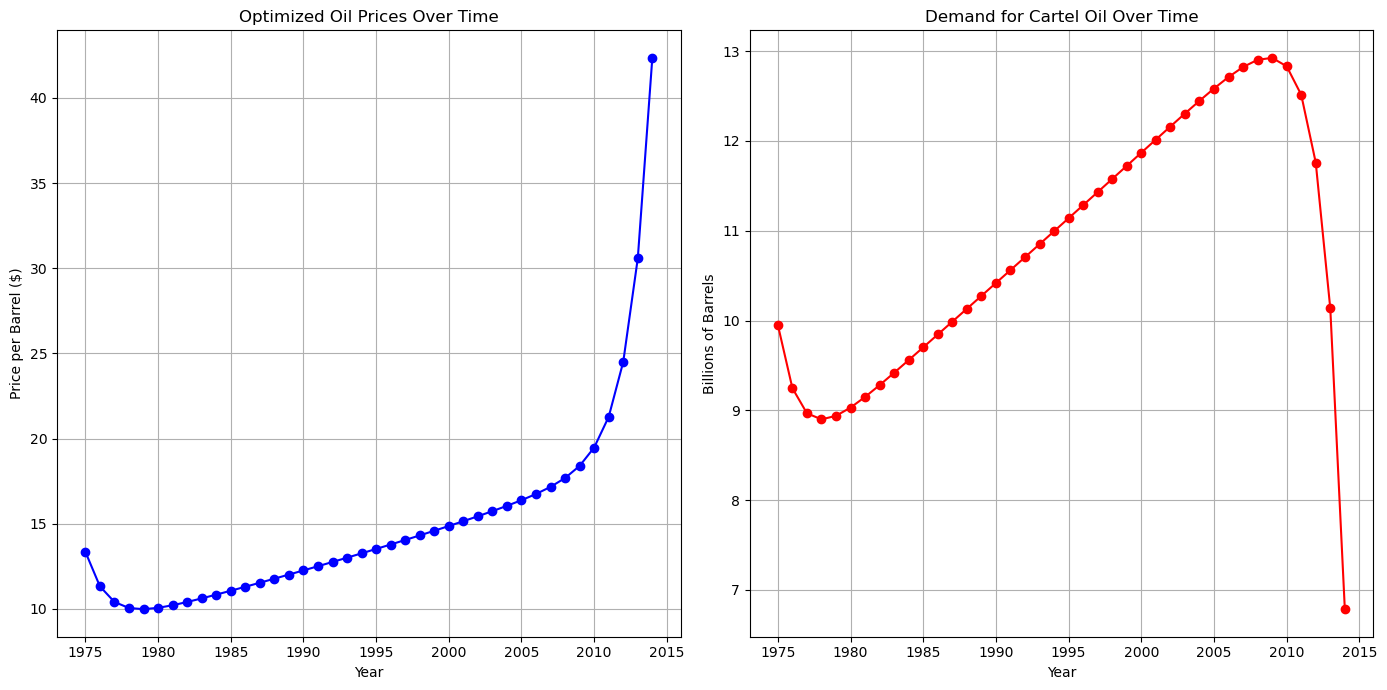

In [2]:
from PindyckCartelOilModel import OilCartelModel
default = OilCartelModel(display_dataframe=1)
default.run_model()

# Change of parameters

We will now show how the solution changes for different parameter values. First we take a look at an increase in the oil price responsiveness of supply and demand. If we **double the coefficients on $P_t$** in equation 1 and 2 we get the following results:

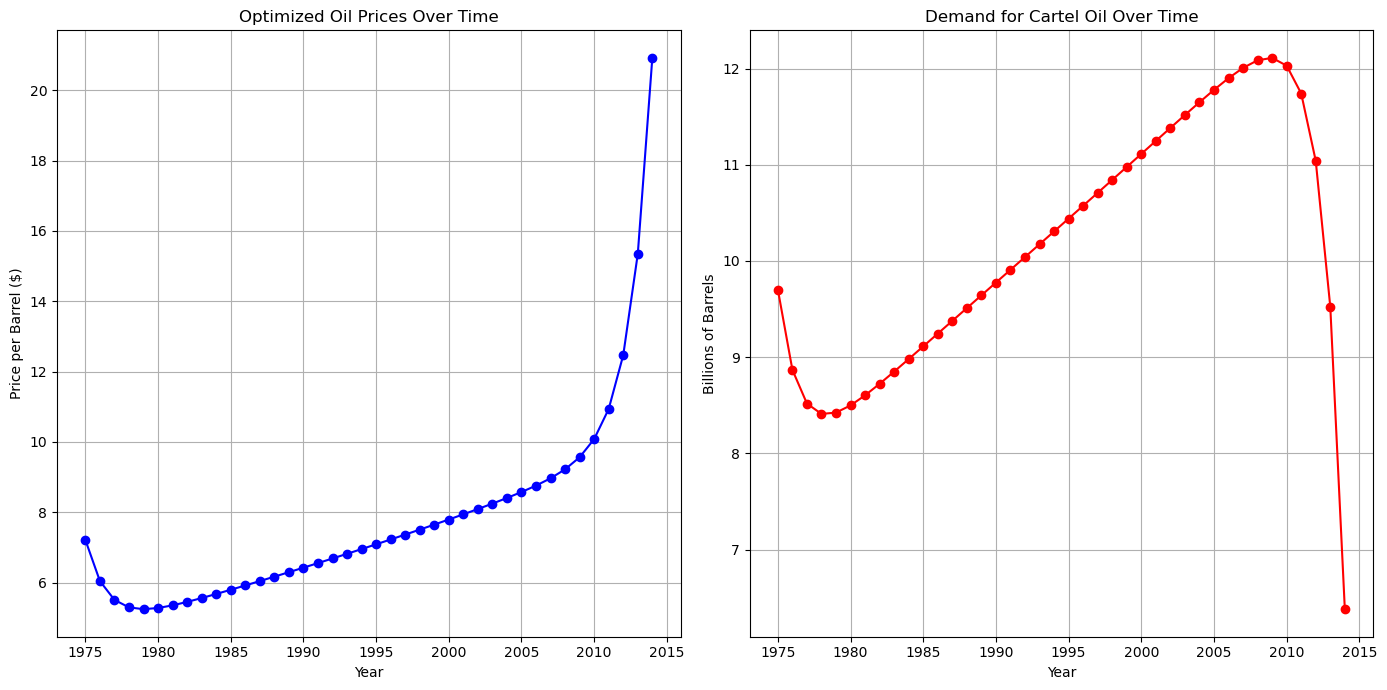

In [3]:
par1 = OilCartelModel(slope_demand=0.26, slope_supply=0.2)
par1.run_model()

Prices are halved in every year and demand is slightly reduced compared to base values.

Now we take a look at an **increase in the growth rate of demand. $g*2$** gives the following results:

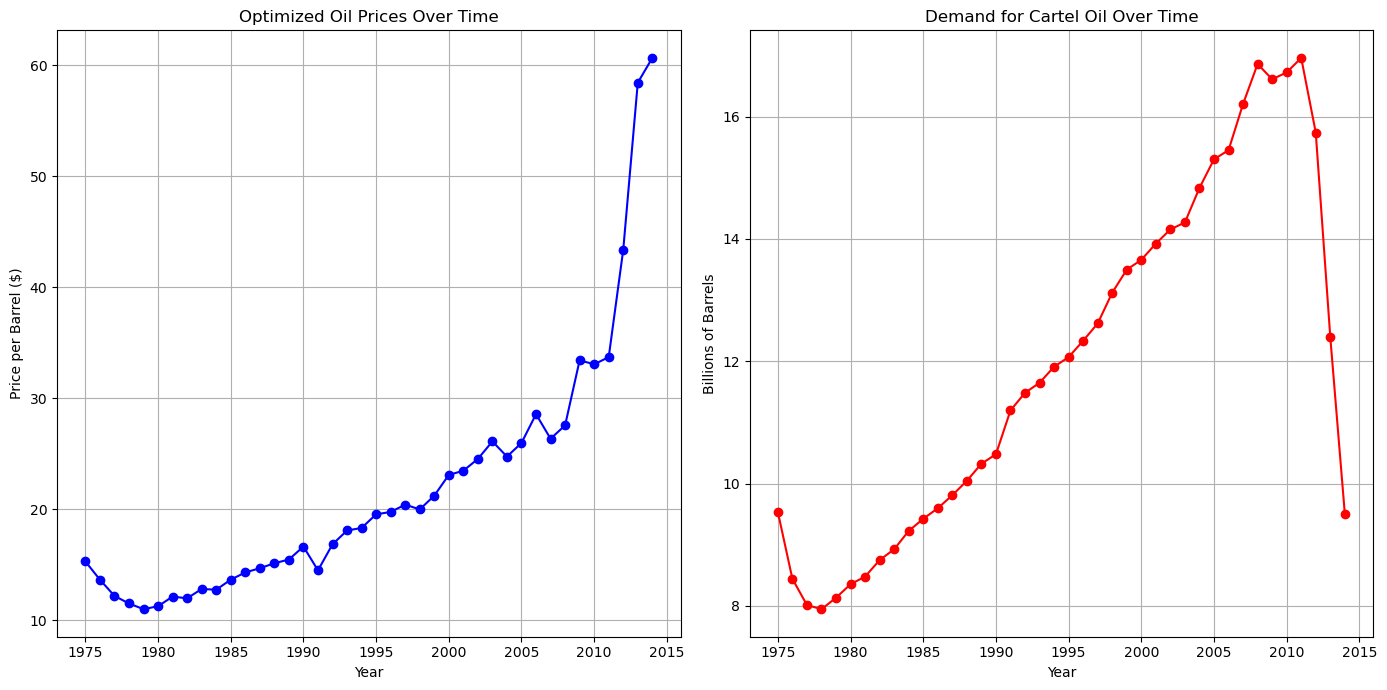

In [4]:
par2 = OilCartelModel(g=0.03)
par2.run_model()

As expected, demand for cartel oil increases by a higher rate compared to base values. The optimal price also increase by a higher rate. We also observe some fluctuations in both prices and demand.

**Doubling the depletion rate for the fringe countries $\alpha$** gives:

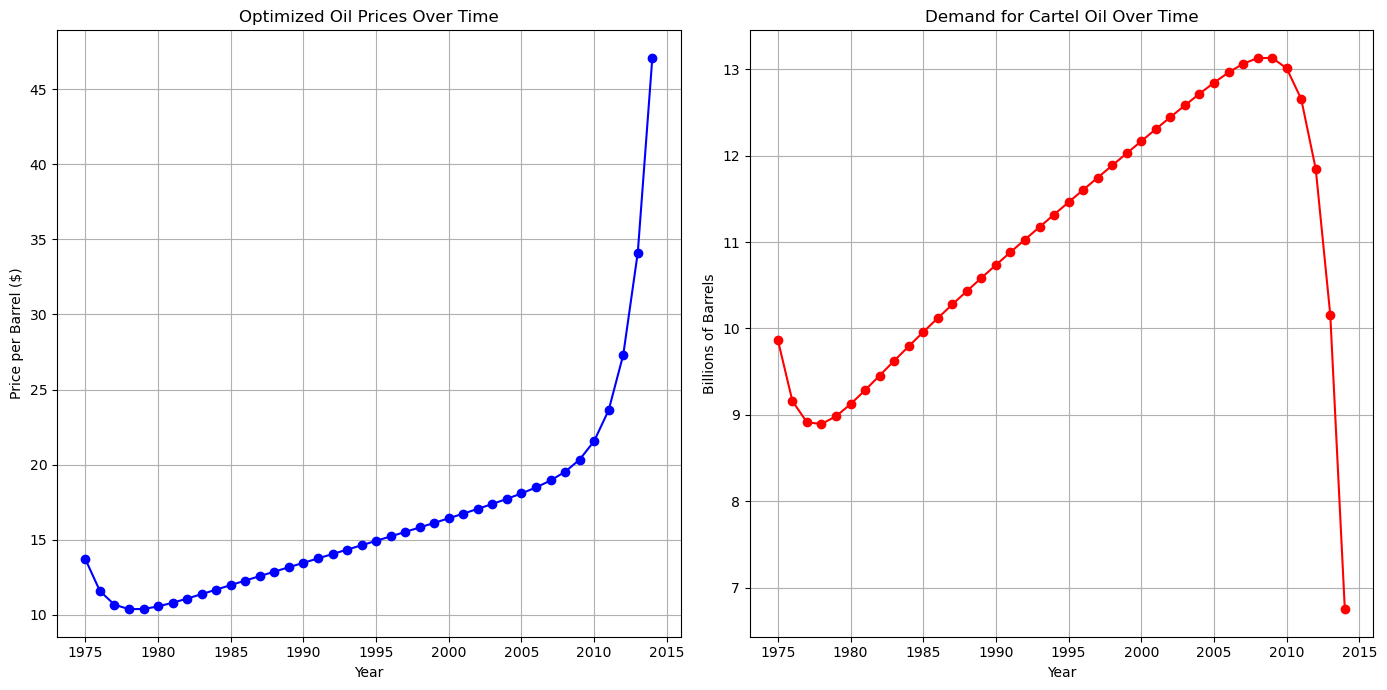

In [5]:
par3 = OilCartelModel(alpha=0.04)
par3.run_model()

We observe slightly higher optimal prices and approximately unchanged demand for cartel oil compared to base values.

If we **double the initial production cost, $c$, to 2 dollars per barrel** we get:

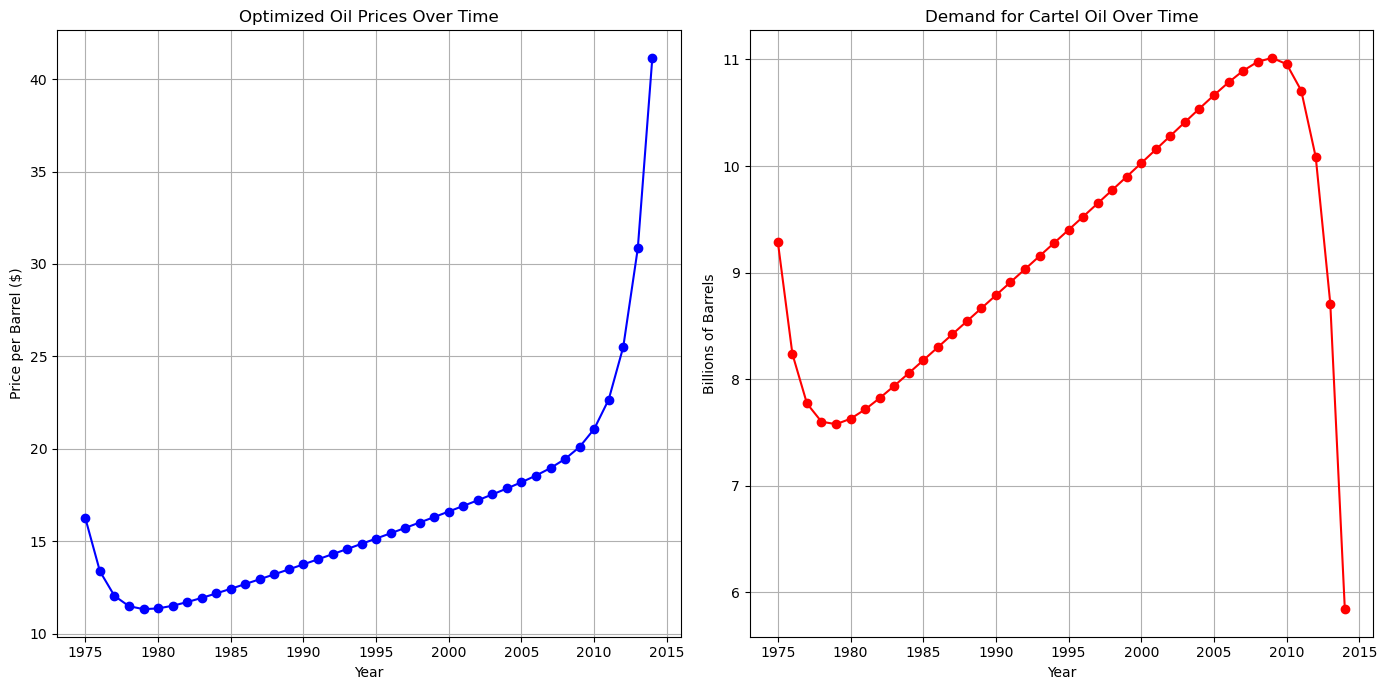

In [6]:
par5 = OilCartelModel(c=2)
par5.run_model()

Finally we **double the discount factor, $\delta$, to 0.1** and get:

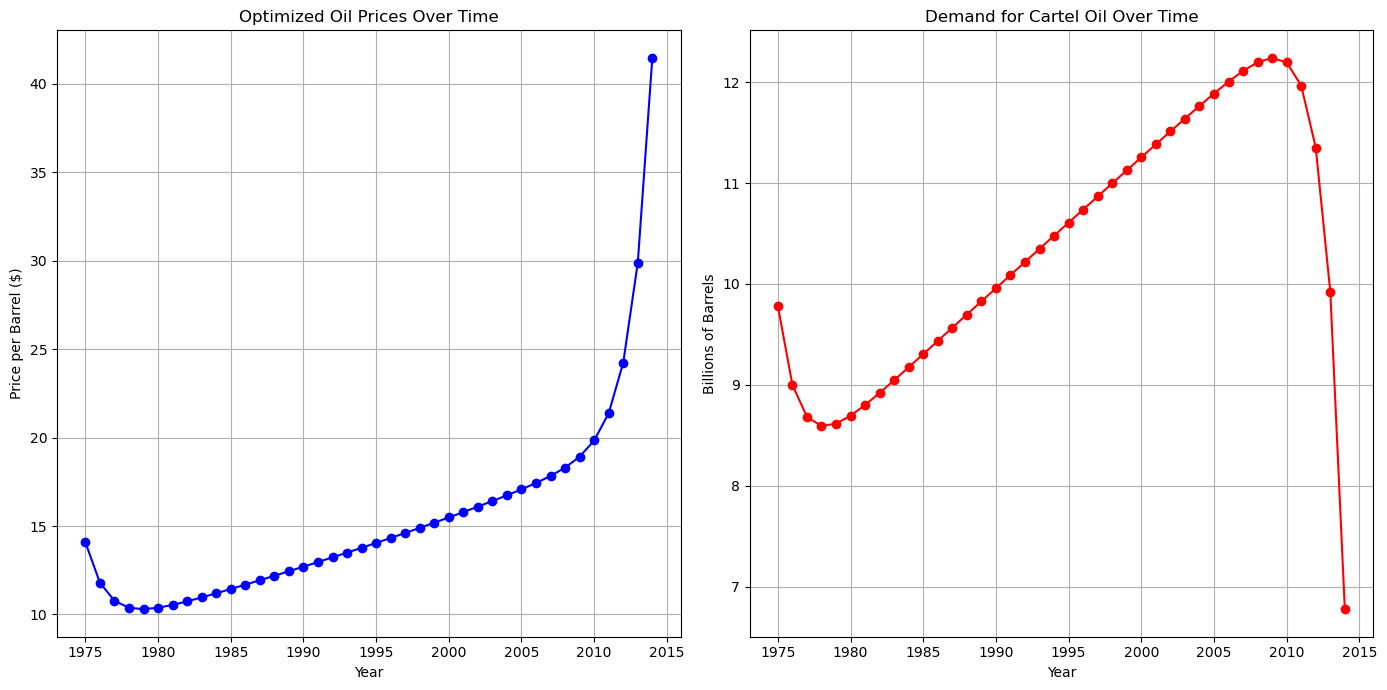

In [7]:
par6 = OilCartelModel(delta=0.1)
par6.run_model()

Compared to base values we see lower demand but approximately unchanged prices.

# Model Extension with Oil Exploration

The oil exploration extension incorporates additional dynamics for reserves, exploration efforts, and the associated costs:

1. **Reserve Dynamics**:
   $$
   R_t = R_{t-1} - D_t + E_t
   $$
   where $E_t$ represents the new cartel reserves added through exploration.


2. **Exploration Effort**:
   $$
   E_t = \phi(P_t - P_{base}) \times \gamma \left( \frac{1}{R_{t-1}} \right), \quad E_t \geq 0
   $$
   $\phi$ is a coefficient that determines sensitivity to price changes and $P_{base}$ is a base price threshold below which exploration does not increase. $\gamma$ is a coefficient that adjusts the impact of decreasing reserves on exploration impetus.


3. **Exploration Costs**:
   $$
   EC_t = K_{fix} + K_{var} E_t^\lambda
   $$
   $K_{fix}$ and $K_{var}$ are fixed and variable costs related to exploration and $\lambda$ reflects increasing costs at higher levels of exploration effort.


4. **Objective Function with Exploration**:
   $$
   W = \sum_{t=1}^{N} \frac{\left( P_t - \frac{c \cdot R_0}{R_t} \right) D_t - EC_t}{(1 + \delta)^t}
   $$
   This revised objective function aims to maximize the net present value of the cartel’s profits, taking into account the costs of exploration.

#### Additional Variables:
- $E_t$: New cartel reserves through exploration (billions of barrels per year)
- $EC_t$: Explorations costs in billions 1975 dollars

#### Additional Parameters:
- $\phi$, $P_{base}$, $\gamma$, $\lambda$: Coefficients for the exploration function
- $K_{fix}$, $K_{var}$: Cost parameters for exploration

The model uses the following specific parameter values:

- **$P_{base}=$** 16 dollars
- **$\phi=$** 0.75
- **$\gamma=$** 750
- **$K_{fix}=$** 0
- **$K_{var}=$** 0.1
- **$\lambda=$** 1.1

This extension allows the model to consider the impact of proactive exploration efforts and the financial costs associated with increasing reserve levels, thus providing a more comprehensive view of the economic decisions faced by an oil cartel.


,Year,Optimized Prices ($),Demand for Cartel Oil (D_t),Total Oil Demand (TD_t),Cartel Reserves (R_t),Exploration Costs (EC_t),Exploration Volume (E_t)
,1975,13.01,10.03,17.30,489.97,0.00,0.00
,1976,11.06,9.37,16.99,480.60,0.00,0.00
,1977,10.19,9.11,16.86,471.49,0.00,0.00
,1978,9.85,9.06,16.83,462.43,0.00,0.00
,1979,9.78,9.12,16.85,453.31,0.00,0.00
,1980,9.86,9.22,16.89,444.09,0.00,0.00
,1981,10.00,9.35,16.95,434.74,0.00,0.00
,1982,10.19,9.49,17.01,425.25,0.00,0.00
,1983,10.39,9.64,17.08,415.62,0.00,0.00
,1984,10.60,9.79,17.15,405.83,0.00,0.00


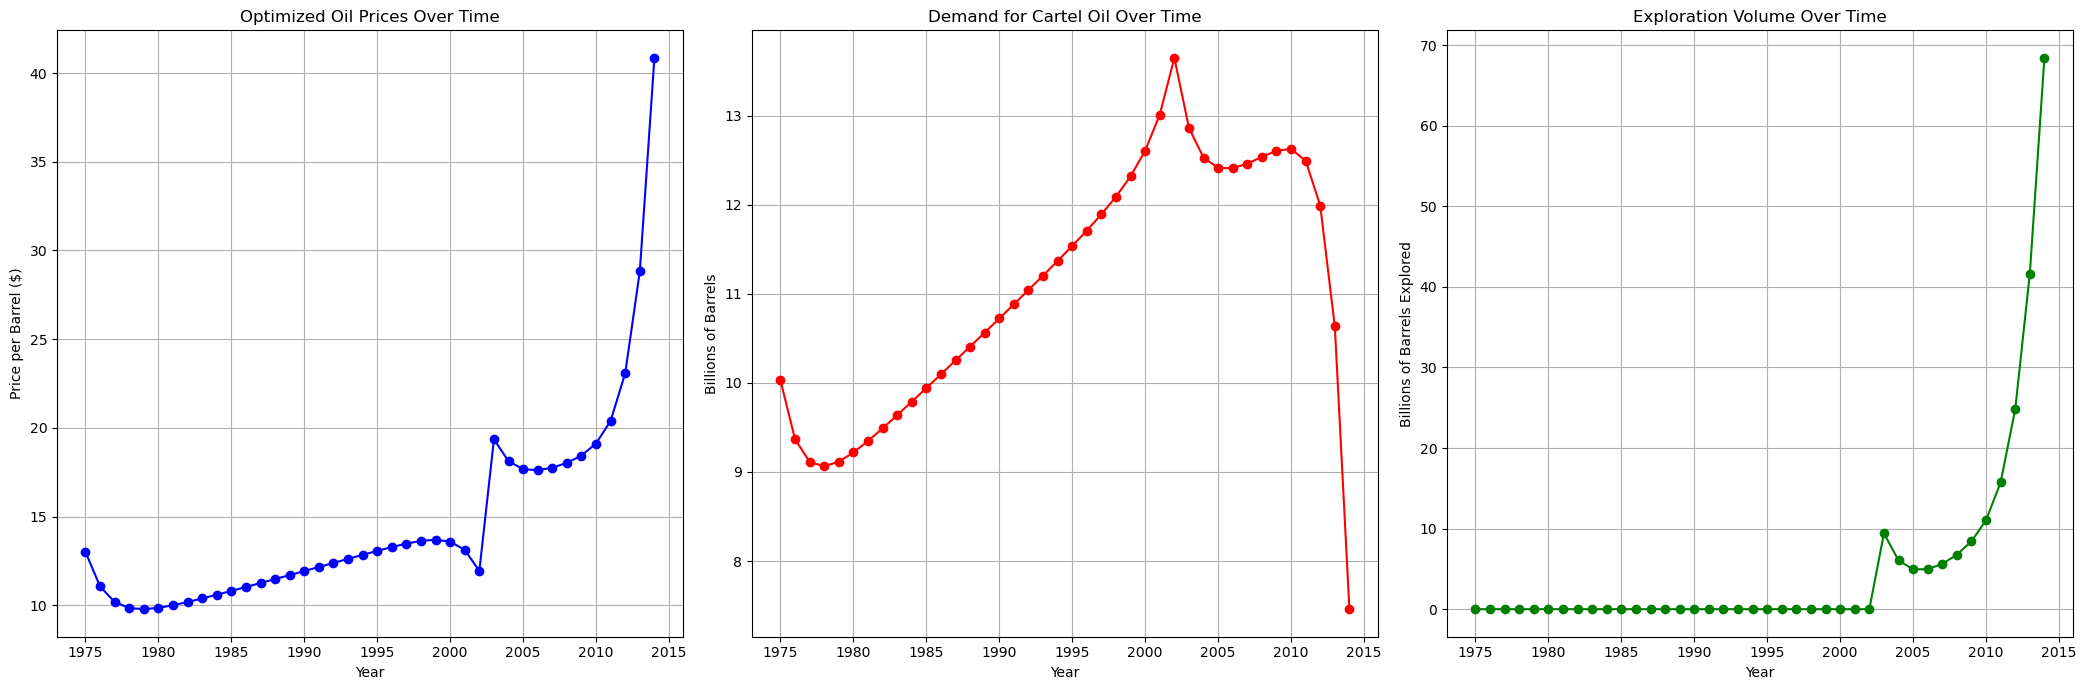

In [8]:
from PindyckCartelOilModel import OilCartelModelExploration
defaultEx = OilCartelModelExploration()
defaultEx.run_model()

# Conclusion

When changing the parameters on the basic model we see that the solutions are relatively stable. The optimal price trajectories and demand curves follow roughly the same shape with some differences in the overall levels. However, extending the model with oil exploration changes the dynamics quite a bit resulting in a rather peculiar optimal price trajectory and demand curve. 

We see that when cartel reserves exeeds a certain threshold in 2002, oil exploration becomes profitable leading to an initial exploration volume of 9.42 billion barrels in 2003 set at an optimal price of 19.36 $ per barrel. Initially the exploration volume slightly decreases as costs increase at higher levels of exploration effort. This effect however is counteracted by the increasing exploration impetus caused by decreasing reserves leading to an exponential rise in exploration volume and price from 2006 and onwards.